## Building a Natural Language Processing (NLP) Model that Rates the Sentiment of Tweets about Apple and Google Products as Positive, Negative or Neutral.

+ **Student:** Wambui Munene
+ **Student pace:** DSPT08
+ **Scheduled project review date/time:** 12/02/2025 23.59 Hours
+ **Instructor name:** Samuel Karu

## Project Summary

### Data Understanding

Social media is a dynamic and widespread platform where customers freely express their thoughts and feelings about products, services, and brands.Using social media platforms like X (formerly twitter) to gauge sentiments is immensely valuable for businesses as it provides real-time and unfiltered insights into customer opinions and experiences. 

The objective of this project is to build a Natural Language Processing (NLP) model that rates the sentiment of tweets about Apple and Google products as positive, negative or neutral. The dataset used to build the model is sourced from CrowdFlower via data.world https://data.world/crowdflower/brands-and-product-emotions. This dataset consists of slightly over 9,000 human-rated tweets. 

- **Features:** prior to the preprocessing steps every row in the dataset only contains one feature; a string containing the full text of an individual tweet. During preprocessing a string of tweet text will be converted inoto individual words creating more features. 
 - **Target:** the target consists of labels (emotions) for different tweets - positive, negative, neutral and 'can't tell'. By looking at the value counts for each sentiment, a decision will be made on which of the classes to use to achieve our objectives


### Problem Statement
Sentiment Analysis is a powerful tool that provides businesses with deep insights into public perception of their products and services. By leveraging sentiment analysis, companies can effectively gauge customer sentiment and understand the emotional tone behind customer interactions. This enables businesses to identify  areas of concern in real-time, allowing them to proactively address customer needs and improve their offerings.

By analyzing these sentiments from the tweets about their products and that of their competitor, Apple can tap into a wealth of authentic feedback that traditional surveys or feedback forms might miss. This immediate access to customer sentiment will allow them to  swiftly identify trends, preferences, and potential issues, allowing for proactive engagement and timely adjustments to strategies.

### Business Objectives
+ **Goal:**
     + Train classification models using the provided labeled tweets to identify sentiments about Apple and Google Products
 + **Specific Objectives:**
     + Identify the distribution of negative and positive tweets by company; this is crucial in assessing how the sentiments of Apple products compare to those of Google products (competition landscape analysis)
     + Train and tune at least 3 classification models to identify positive, negative and neutral sentiments on previously unseen tweets.
     + Train and tune at least 3 classification models to identify negative sentiments on previously unseen tweets
     + Provide to Apple the most optimal model to deploy on future (new) customers' data to identify negative sentiments on their products 
    

## Requirements
Below are the steps that will be taken to achieve the business objectives identified above.

### 1. Load the Data
Use Pandas to load the dataset and get a sense of what is in the dataset by visually inspecting the data.

### 2. Perform Data Cleaning with nltk 
- Use Regular Expressions (REGEX) to remove irrelevant information such as URLs,mentions(@) and hastags(#).
- Converte all text to lowercase to ensure uniformity
- Apply lemmatization to reduce words to their base forms for consistent analysis and reducing complexity
- Remove stop words (common words that typically do not carry significant meaning such as "the," "is," "in," "and," etc.). This helped in focusing on more meaningful words in the text, leading to better performance of NLP models.
- Tokenize the cleaned text

### 3. Perform Exploratory Data Analysis
  - Analyze the positive and negative sentiments by company.
 - Analyze the distribution of sentiment labels (positive, negative,neutral) using bar charts and value counts to understand class balance.
 - Visualize the top 10 most common words in the data set.
 - Created word clouds for positive, negative and neutral tweets to visualize most common words in each sentiment class
 
### 4. Vectorize the text data with TFidfVectorizer
- All data must be in numeric form inorder to fit a scikit-learn model. We will use Term Frequency-Inverse Document Frequency (TF-IDF) vectorizer from sklearn.feature_extraction.text to convert the text data into a vectorized format.Using TF-IDF is important because it effectively weighs the significance of words in a document relative to the entire dataset, helping to distinguish relevant terms from common ones.

 ### 5. Iteratively Build and Evaluate Baseline and Ensemble Models
- Using Pipelines, build and iteratively tune aLogistic Regression and Naive Bayes Models 
- Build and Train one or more ensemble models and compare the resultswith those of the tuned baseline models

 
 ### 6. Evaluation 
The model's performance was evaluated using the following metrics:

- Classification_report from Scikit-learn : This metric provides convenient way to generate detailed performance metrics for classification tasks. It provides a summary of key metrics for each class, including accuracy, precision, recall, and F1-score
- confusion_matrix: It provides a visual summary of the prediction results by showing the count of true positives, true negatives, false positives, and false negatives.


### 1.1 Load and Clean the Dataset


In [1]:
# Import the necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline


In [2]:
# Load the data as a DataFrame and display the first 10 columns
df = pd.read_csv('tweet_product_company.csv', encoding='ISO-8859-1')
df.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


This data set consists of tweets mainly focussed on apple and google products showing positive, negative or neutral emotions

In [3]:
# check the shape of the data
df.shape
print(f"This data set consists of {df.shape[0]} rows")
print(f"This data set consists of {df.shape[1]} columns")

This data set consists of 9093 rows
This data set consists of 3 columns


In [4]:
# Get column names
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

The three columns are of the object data type; the names of the columns are rather wordy, so I will rename the column names to more user-friendly names.

In [5]:
# Rename column names
df.rename(columns={
    'tweet_text': 'tweet',
    'emotion_in_tweet_is_directed_at': 'product',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'
}, inplace=True)

df.head()

,tweet,product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


The column names have been successfully renamed

In [6]:
# Get column attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9092 non-null   object
 1   product    3291 non-null   object
 2   sentiment  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


There are significant null values under the product column accounting to more than 60% of the data set. I will first try to fill this column with either Apple or Google if the tweet contains the word iphone, ipad or google. Then fill all the remaining NAN values with 'unknown'.

In [7]:
# Get value counts to see the distribution of products
df['product'].value_counts()

product
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

The product distribution seems quite repetitive. All google products will be labelled Google while all Apple products(ipads/iphone) will be labelled Apple.

In [8]:
# Define a function to categorize products
def categorize_product(tweet):
    if pd.isnull(tweet):
        return 'unknown'
    tweet = tweet.lower()
    if 'iphone' in tweet or 'ipad' in tweet or 'apple' in tweet:
        return 'Apple'
    elif 'google' in tweet or 'android' in tweet:
        return 'Google'
    else:
        return 'unknown'

# Apply the function to the 'tweet' column and fill the 'product' column
df['product'] = df['tweet'].apply(categorize_product)

# Verify the changes
df.head()



,tweet,product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Apple,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Apple,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Apple,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Apple,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [9]:
 df['product'].value_counts()

product
Apple      5525
Google     2781
unknown     787
Name: count, dtype: int64

This  has immensely improved the product labeling.

In [10]:
# Check for missing values in the DataFrame
df.isnull().sum()

tweet        1
product      0
sentiment    0
dtype: int64

In [11]:
# Drop row with Null values
df= df.dropna()

# Check for missing values in the DataFrame
df.isnull().sum()

tweet        0
product      0
sentiment    0
dtype: int64

There are now no missing values in the dataset. 


In [12]:
# check the value counts for the sentiment column
df['sentiment'].value_counts()

sentiment
No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

There are 4 labels in the sentiment column. The sentiment wordings are quite wordy, so I will change the wordings to Positive, Negative and Neutral and drop the rows where the sentiment is 'I can't tell'

In [13]:
# Replace sentiments
df.loc[:, 'sentiment'] = df['sentiment'].replace({
    'No emotion toward brand or product': 'Neutral',
    'Positive emotion': 'Positive',
    'Negative emotion': 'Negative'
})

# Drop rows where sentiment is 'I can't tell'
df = df[df['sentiment'] != "I can't tell"]

# Verify the changes
print(df['sentiment'].value_counts())
print()
print(df.head())



sentiment
Neutral     5388
Positive    2978
Negative     570
Name: count, dtype: int64

                                               tweet product sentiment
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   Apple  Negative
1  @jessedee Know about @fludapp ? Awesome iPad/i...   Apple  Positive
2  @swonderlin Can not wait for #iPad 2 also. The...   Apple  Positive
3  @sxsw I hope this year's festival isn't as cra...   Apple  Negative
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...  Google  Positive


The 'I can't tell' label has been dropped.The tweets are mostly neutral and positive with very few negative tweets - this is a class imbalanced dataset. 

### 1.2 Data Splitting 
The data will be will split into the training and test sets. The splits are 70% for training, 30% for testing. 

In [14]:
# Import the relevant library from scikit-learn to split the data
from sklearn.model_selection import train_test_split

# DeFine the features and target
X = df['tweet']
y = df['sentiment']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shape of the datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (6255,)
X_test shape: (2681,)
y_train shape: (6255,)
y_test shape: (2681,)


### 1.3 Text Transformations
In this section, we will start the process of preparing the feature column (tweet) for vectorization. This will involve:
- removing unnessary text and symbols like URLs, mentions (@),hashtags(#),links,numbers,punctuation and symbols
- convert all text to lowercase to ensure uniformity
- apply lemmatization to reduce words to their base forms for consistent analysis and reducing complexity
- remove stop words (common words that typically do not carry significant meaning such as "the," "is," "in," "and," etc.). 
- tokenize the cleaned text into individual words

In [15]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Define a function for text preprocessing
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#', '', text)
    # Remove [video] and {link}
    text = re.sub(r'\[.*?\]|\{.*?\}', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation and symbols
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove the word 'rt'
    text = re.sub(r'\brt\b', '', text)
    # Remove the words 'sxsw' and 'austin'
    text = re.sub(r'\bsxsw\b|\baustin\b', '', text)
    # Lemmatize text
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


# Apply the preprocessing function to the text data
X_train_preprocessed = X_train.apply(preprocess_text)
X_test_preprocessed = X_test.apply(preprocess_text)

# Verify the changes
print("Training Set:")
print(X_train_preprocessed.head())

print("\nTest Set:")
print(X_test_preprocessed.head())



Training Set:
8159                        alright someone need buy ipad
1814    building custom android home screen sxswi stuf...
3851    line already forming temp apple storeand doesn...
3610    google try give doodle whimsical fun spirit go...
3564    think might quit resume tonight ipadiphone tet...
Name: tweet, dtype: object

Test Set:
563     ûï google doesnt place value domain extension ...
6412    one minute ago guy spoke outside apple popup s...
1348                bring laptopipad go participate today
7000                            iphone apps keep grooving
4889    umm hello android awesome new version iphone n...
Name: tweet, dtype: object


The feature column has now been transformed into lowercase strings without numbers and symbols. The next step is to tokenize the cleaned text. Tokenization is the process of converting the tweets into individual words. 

In [18]:
from nltk.tokenize import word_tokenize

# Create DataFrames to store the data
train_df = pd.DataFrame({'tweet': X_train_preprocessed})
test_df = pd.DataFrame({'tweet': X_test_preprocessed})

# Define a function for tokenization
def tokenize_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    return tokens

# Step 2: Create a new column for the tokenized text
train_df['tweet_tokenized'] = train_df['tweet'].apply(tokenize_text)
test_df['tweet_tokenized'] = test_df['tweet'].apply(tokenize_text)

# Display the first 5 rows of each set
print("Training Set - First 5 Rows:")
print(train_df.head())
print("\nTest Set - First 5 Rows:")
print(test_df.head())

# Check the shapes of the DataFrames
print("\nTraining Set Shape:", train_df.shape)
print("Test Set Shape:", test_df.shape)

Training Set - First 5 Rows:
                                                  tweet  \
8159                      alright someone need buy ipad   
1814  building custom android home screen sxswi stuf...   
3851  line already forming temp apple storeand doesn...   
3610  google try give doodle whimsical fun spirit go...   
3564  think might quit resume tonight ipadiphone tet...   

                                        tweet_tokenized  
8159                [alright, someone, need, buy, ipad]  
1814  [building, custom, android, home, screen, sxsw...  
3851  [line, already, forming, temp, apple, storeand...  
3610  [google, try, give, doodle, whimsical, fun, sp...  
3564  [think, might, quit, resume, tonight, ipadipho...  

Test Set - First 5 Rows:
                                                  tweet  \
563   ûï google doesnt place value domain extension ...   
6412  one minute ago guy spoke outside apple popup s...   
1348              bring laptopipad go participate today   
7000  

The tweets are now tokenized into individual words and a dataframe created with two columns - the preprocessed tweets and the tokenized tweets. The next step is to perform Exploratory Data Analysis (EDA) before vectorization

### 1.4 Exploratory Data Analysis (EDA) 
In this section I will: 

- Analyze Sentiment Distribution: Use bar charts and value counts to understand the class balance of sentiment labels (positive, negative, neutral). This helps identify any class imbalances.

- Visualize Top Common Words: Identify and display the top 10 most common words in the dataset. This gives an overview of the predominant terms.

- Create Word Clouds: Generate word clouds for positive, negative, and neutral tweets to visualize the most common words in each sentiment class. This provides a visual representation of word frequency and sentiment-specific terms.



To perform EDA I will combine the train_df and the y_train (sentiments) into a single data frame. However I will use a copy   of the train_df to avoid modifying the original DataFrame

In [19]:
# Confirm that the number of rows are the same
print(y_train.shape)
print(train_df.shape)

(6255,)
(6255, 2)


In [20]:
# Combine train_df and y_train
train_eda_df = train_df.copy()
train_eda_df['target'] = y_train.values

# Display the first few rows of the combined DataFrame
train_eda_df.head()



,tweet,tweet_tokenized,target
8159,alright someone need buy ipad,"[alright, someone, need, buy, ipad]",Neutral
1814,building custom android home screen sxswi stuf...,"[building, custom, android, home, screen, sxsw...",Neutral
3851,line already forming temp apple storeand doesn...,"[line, already, forming, temp, apple, storeand...",Neutral
3610,google try give doodle whimsical fun spirit go...,"[google, try, give, doodle, whimsical, fun, sp...",Positive
3564,think might quit resume tonight ipadiphone tet...,"[think, might, quit, resume, tonight, ipadipho...",Positive


In [21]:
train_eda_df.shape

(6255, 3)

In [22]:
train_eda_df['target'].value_counts()

target
Neutral     3776
Positive    2098
Negative     381
Name: count, dtype: int64

#### 1.4.1 Analyze Sentiment Distribution

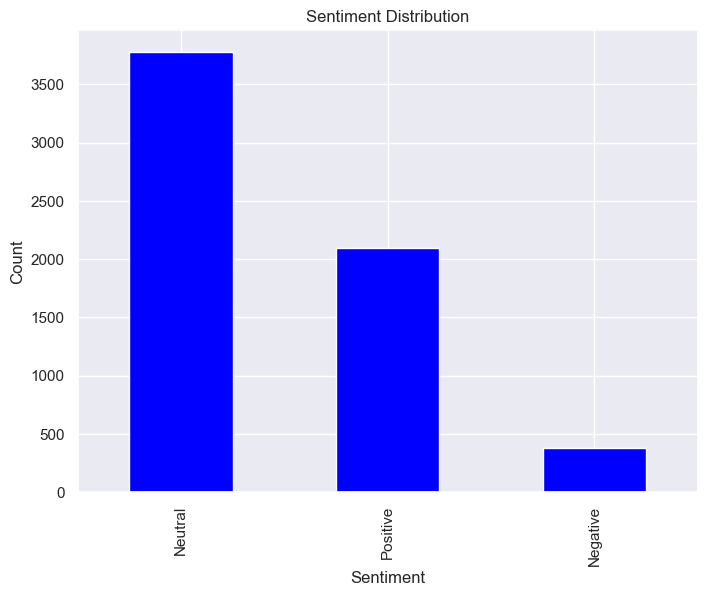

In [23]:
import matplotlib.pyplot as plt

# Count the sentiment labels
sentiment_counts = train_eda_df['target'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='blue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


The tweets are mostly neutral and positive with very few negative tweets, indicative of satisfaction with the products. However this class imbalance may prove to be problematic during modeling and we will handle it with various techniques e.g. SMOTE to oversample the minority class.

#### 1.4.2 Visualize Top Common Words

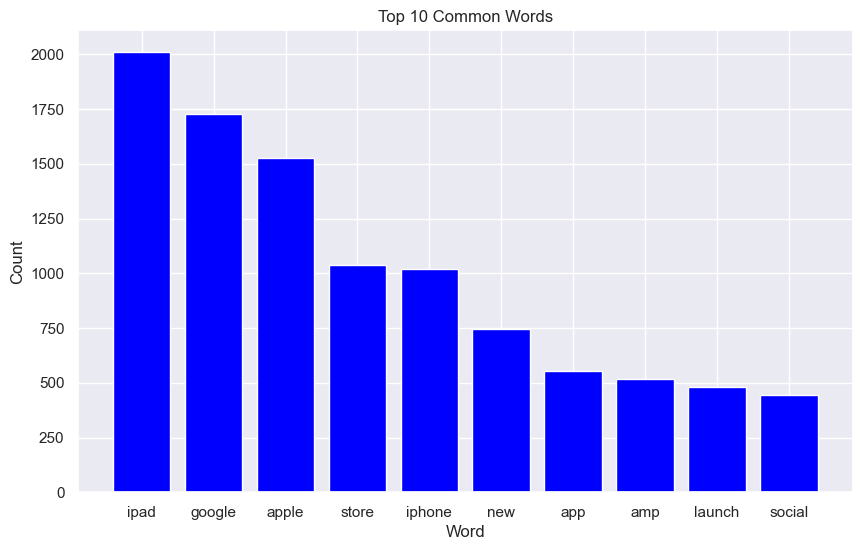

In [24]:
from collections import Counter

# Tokenize the cleaned text data
all_words = ' '.join(train_eda_df['tweet']).split()

# Get the top 10 common words
common_words = Counter(all_words).most_common(10)

# Create a DataFrame for visualization
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Plot the top common words
plt.figure(figsize=(10, 6))
plt.bar(common_words_df['Word'], common_words_df['Count'], color='blue')
plt.title('Top 10 Common Words')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()


As is to be expected because the tweets are about Apple and Google products, the top words include ipad, apple, iphone,android etc meaning these words are common among tweets. The use of TF-IDF vectorization will put less weight on these words during modeling. However, I will visualize the top 10 words again excluding those common words. 

#### 1.4.3 Visualize Top Common Words Excluding Product Specific Words

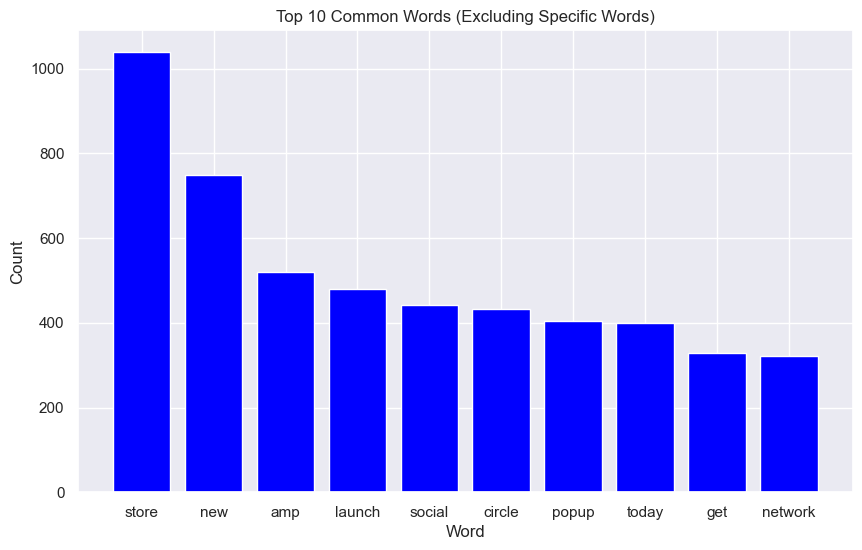

In [25]:

# List of words to exclude
exclude_words = {'ipad', 'google', 'apple', 'iphone', 'app','android','sxsw','austin'}

# Tokenize the cleaned text data
all_words = ' '.join(train_eda_df['tweet']).split()

# Remove the exclude words from the tokenized list
filtered_words = [word for word in all_words if word not in exclude_words]

# Get the top 10 common words
common_words = Counter(filtered_words).most_common(10)

# Create a DataFrame for visualization
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Plot the top common words excluding specified words
plt.figure(figsize=(10, 6))
plt.bar(common_words_df['Word'], common_words_df['Count'], color='blue')
plt.title('Top 10 Common Words (Excluding Specific Words)')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()


Even after removing the product related words and the name and location of the conference that was the subject of these tweets, the top 10 words do not have any emotional attributes - positive or negative. I will now visualize the top words by sentiment to see if emotive words emerge.

#### 1.4.4 Visualize Top Common Words by Sentiment

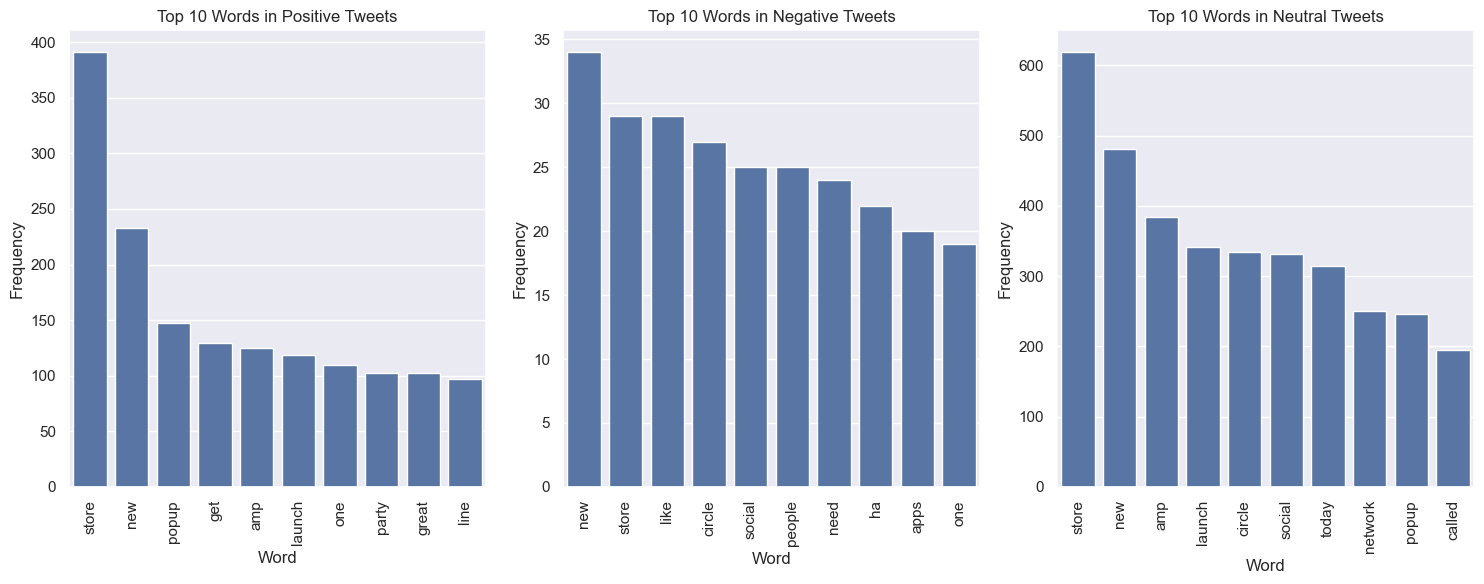

In [26]:
# List of words to exclude
exclude_words = {'ipad', 'google', 'apple', 'iphone', 'app', 'android', 'sxsw', 'austin'}

# Function to count word frequencies excluding specific words
def word_frequencies(data, sentiment, exclude_words, top_n=10):
    text = ' '.join(data[data['target'] == sentiment]['tweet'])
    words = [word for word in text.split() if word.lower() not in exclude_words]
    counter = Counter(words)
    common_words = counter.most_common(top_n)
    return common_words

# Plotting function for word frequencies in a single row
def plot_word_frequencies_single_row(train_eda_df, sentiments, exclude_words, top_n=10):
    fig, axs = plt.subplots(nrows=1, ncols=len(sentiments), figsize=(5*len(sentiments), 6))
    for i, sentiment in enumerate(sentiments):
        word_freq = word_frequencies(train_eda_df, sentiment, exclude_words, top_n)
        words = [word[0] for word in word_freq]
        frequencies = [word[1] for word in word_freq]
        sns.barplot(y=frequencies, x=words, ax=axs[i])
        axs[i].set_title(f'Top {top_n} Words in {sentiment} Tweets')
        axs[i].set_ylabel('Frequency')
        axs[i].set_xlabel('Word')
        axs[i].tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()

# Sentiments to plot
sentiments = ['Positive', 'Negative', 'Neutral']

# Plot top ten words for each sentiment in a single row
plot_word_frequencies_single_row(train_eda_df, sentiments, exclude_words)


From the charts above, the positive and neutral tweets have more words in common than with the negative tweets. The emotions are now more evident especially in the positive tweets. The positive tweets have words like 'get','party' and 'great'.The emotive words do not emerge as well in the neutral and negative sentiments - these two have most words in common. 

I will now create word clouds to see if we can pick out more emotive words, especially in the neutral and negative sentiments.

#### 1.4.5 Create Word Clouds by Sentiment

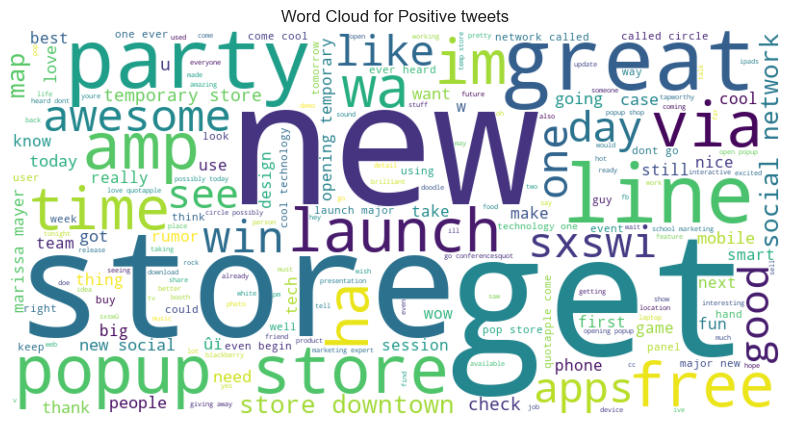

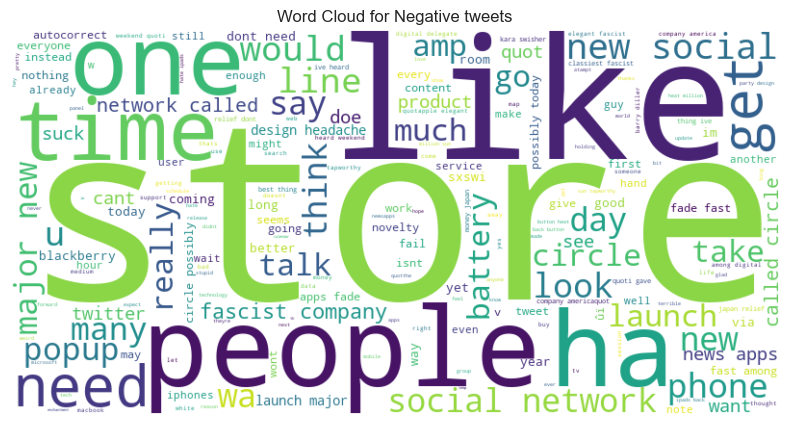

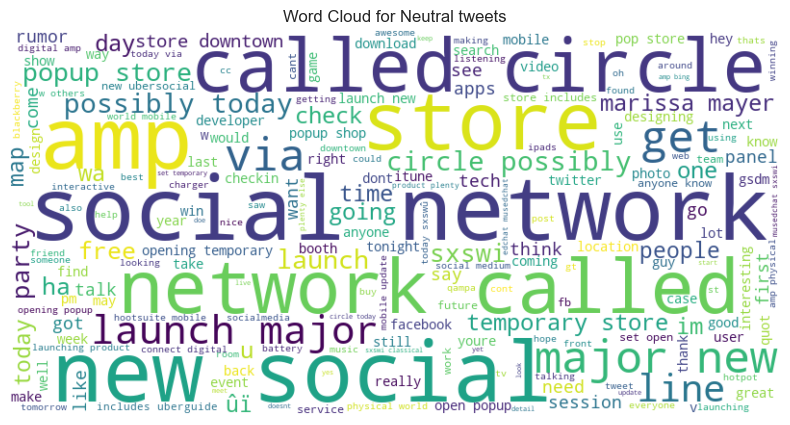

In [27]:
from wordcloud import WordCloud

# List of words to exclude
exclude_words = {'ipad', 'google', 'apple', 'iphone', 'app', 'android', 'sxsw', 'austin'}

# Function to generate word clouds
def generate_wordcloud(data, sentiment, exclude_words):
    text = ' '.join(data[data['target'] == sentiment]['tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=exclude_words).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} tweets')
    plt.show()

# Generate word clouds for each sentiment
generate_wordcloud(train_eda_df, 'Positive', exclude_words)
generate_wordcloud(train_eda_df, 'Negative', exclude_words)
generate_wordcloud(train_eda_df, 'Neutral', exclude_words)



From the word cloud above you can see words like 'love', 'nice', 'great','awesome' in positive tweets and words like 'suck', 'fail' and 'headache','fascist' in negative tweets. The neutral tweets do not seem to have such strong words. 

### 1.5 Text Data Vectorization
I will use Term Frequency=Inverse Document Frequency (TF-IDF) to transform text data into numerical features, capturing the importance of words.Using TF-IDF is important because it effectively weighs the significance of words in a document relative to the entire dataset, helping to distinguish relevant terms from common ones. This is especially important for this dataset as we have seen from the EDA process above that the tweets have a lot of words in common, and we want the vectorization to place less importance to these common words.

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Function to join the list of tokens back into a single string
def join_tokens(tokens):
    return ' '.join(tokens)

# Join tokens for each preprocessed set, applying it to each element
X_train_joined = train_df['tweet_tokenized'].apply(join_tokens)
X_test_joined = test_df['tweet_tokenized'].apply(join_tokens)

# TF-IDF Vectorization for unigrams and bigrams

tfidf_vectorizer = TfidfVectorizer()

# Apply TF-IDF to the joined tokenized text
train_tfidf = tfidf_vectorizer.fit_transform(X_train_joined)
test_tfidf = tfidf_vectorizer.transform(X_test_joined)

# Verify the shape of the transformed data
print("Training set shape:", train_tfidf.shape)
print("Testing set shape:", test_tfidf.shape)

# Display the first 5 rows of the sparse matrix
train_tfidf_df = pd.DataFrame(train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
test_tfidf_df = pd.DataFrame(test_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("Training set:\n", train_tfidf_df.head())
print("Testing set:\n", test_tfidf_df.head())


Training set shape: (6255, 7935)
Testing set shape: (2681, 7935)
Training set:
    ______  _______quot   _û  aapl  aaron   ab  abacus  abba  abc  aber  ...  \
0     0.0          0.0  0.0   0.0    0.0  0.0     0.0   0.0  0.0   0.0  ...   
1     0.0          0.0  0.0   0.0    0.0  0.0     0.0   0.0  0.0   0.0  ...   
2     0.0          0.0  0.0   0.0    0.0  0.0     0.0   0.0  0.0   0.0  ...   
3     0.0          0.0  0.0   0.0    0.0  0.0     0.0   0.0  0.0   0.0  ...   
4     0.0          0.0  0.0   0.0    0.0  0.0     0.0   0.0  0.0   0.0  ...   

   ûïfoursquare  ûïline  ûïmore  ûïmuteû  ûïspecialsû  ûïspecialûï  ûïthe  \
0           0.0     0.0     0.0      0.0          0.0          0.0    0.0   
1           0.0     0.0     0.0      0.0          0.0          0.0    0.0   
2           0.0     0.0     0.0      0.0          0.0          0.0    0.0   
3           0.0     0.0     0.0      0.0          0.0          0.0    0.0   
4           0.0     0.0     0.0      0.0          0.0       

As expected, the features are quite large because they represent the  unique words found in all the tweets(corpus). Each row corresponds to a document (a tweet), and each column represents a unique term (word or n-gram) from the entire corpus.

The fact that the matrices are sparse (i.e., having many zeros) is expected and typical for TF-IDF representations, especially when using n-grams. Sparse matrices are well-suited for the machine learning models that I plan to use. The also have less computational overhead than dense matrices.

I intend to use Principal Component Analysis (PCA), a method that converts the original features into a new set of orthogonal components, maximizing the variance captured in the data. I will apply PCA after evaluating the baseline model with all features to determine if performance improves with the reduced feature set.

Now I will proceed to modeling.

### 2.0 Modeling
- I will start with 2 baseline Logistic Regression and Naive Bayes Models
- Use GridSearchCV and Dimensionality Reduction using PCA to optimize the best Baseline Model
- Use Ensemble models - Random Forest, AdaBoost and XGBoost 
- Depending on the results obtained above train an Artificial Neural Network (ANN).
- Evaluate each model iteration using Accuracy Score and Confusion Matrix.

### 2.1 Baseline Models with Pipelines

In [29]:
# Load all the libraries required for modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from imblearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# Plot the Confusion Matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)

    plt.title(title, fontsize=12)
    plt.ylabel('Actual Label', fontsize=10)
    plt.xlabel('Predicted Label', fontsize=10)

    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

#### 2.1.1 Baseline Logistic Regression Model

Validation Accuracy (Logistic Regression with SMOTE): 0.6475


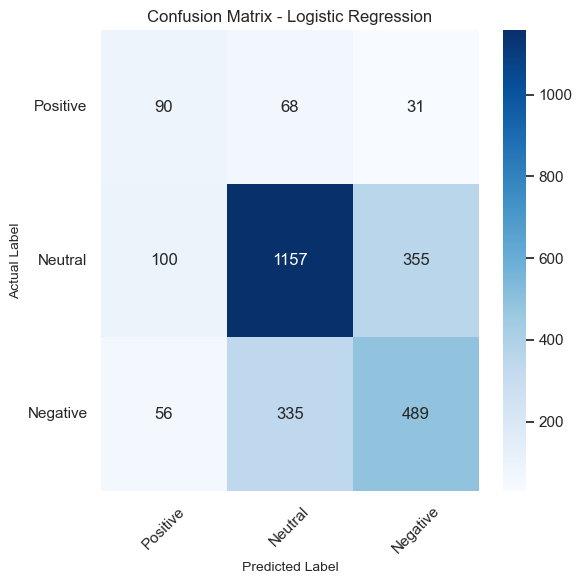

In [36]:
from imblearn.pipeline import Pipeline

# Create a pipeline with the estimator
pipe_lr = Pipeline([
    ('smote',SMOTE(random_state=42)),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced',random_state=42))
])

# Fit the pipeline on the training data
pipe_lr.fit(train_tfidf_df, y_train)

# Evaluate on the validation set
y_pred_lr = pipe_lr.predict(test_tfidf_df)

# Accuracy Score
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Validation Accuracy (Logistic Regression with SMOTE): {accuracy_lr:.4f}")

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_names = ['Positive', 'Neutral', 'Negative']
# Plot the confusion matrix
plot_confusion_matrix(conf_matrix_lr, classes=class_names, title='Confusion Matrix - Logistic Regression')

The Accuracy Score is not that great at 65%. It is still better than random guessing, which for a 3-way class is 33.33%.
- The model struggles significantly with correctly predicting Positive tweets.
- The model performs relatively well with Neutral tweets 
- The model only has a moderate performance for Negative tweets.

I will now train a baseline Naive Bayes model and evaluate the results

#### 2.1.2 Baseline Naive Bayes Model

Validation Accuracy (Naive Bayes with SMOTE): 0.6483


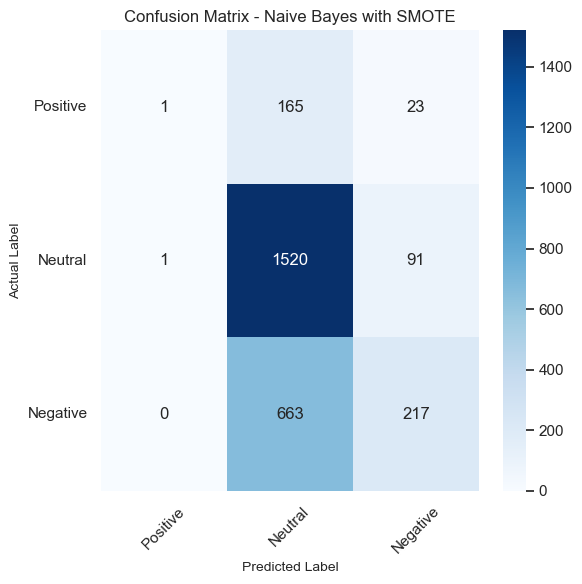

In [39]:
# Define the pipeline with SMOTE and Multinomial Naive Bayes
pipe_nb = Pipeline([
    ('clf', MultinomialNB())
])

# Fit the pipeline on the training data
pipe_nb.fit(train_tfidf_df, y_train)

# Evaluate on the validation set
y_pred_nb = pipe_nb.predict(test_tfidf_df)

# Accuracy Score
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Validation Accuracy (Naive Bayes with SMOTE): {accuracy_nb:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
plot_confusion_matrix(conf_matrix, classes=class_names, title='Confusion Matrix - Naive Bayes with SMOTE')


The Naive Bayes Model seems to have better without the SMOTE oversampling. However, it is still struggling to differentiate between the Neutral and Positive, and Neutral and Negative classes. The model is quite adept at identifying the Neutral class.

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Hyperparameters: {'clf__alpha': 0.5, 'clf__fit_prior': True}
Validation Accuracy (Hyperparameter Tuned Naive Bayes): 0.6628


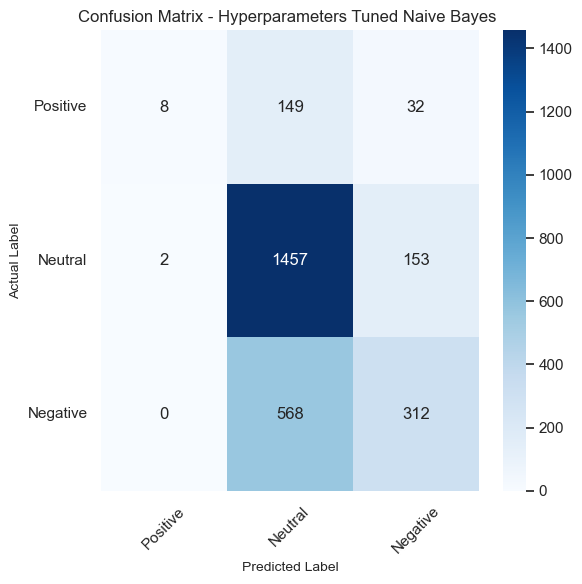

In [40]:
# Define the parameter grid for Grid Search
param_grid = {
    'clf__alpha': [0.1, 0.5, 1.0],  # Smoothing parameter
    'clf__fit_prior': [True, False]  # Whether to learn class prior probabilities
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=pipe_nb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(train_tfidf_df, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Best hyperparameters found by grid search
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Evaluate the best model on the validation set
y_pred_nb = best_model.predict(test_tfidf_df)
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Validation Accuracy (Hyperparameter Tuned Naive Bayes): {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
plot_confusion_matrix(conf_matrix, classes=class_names, title='Confusion Matrix - Hyperparameters Tuned Naive Bayes ')


The Accuracy Score of 66%, slightly better than the baseline NB model,and the Baseline Logistic Regression Model. However, the model still
- struggles significantly with correctly predicting Positive tweets.
- The model performs relatively well with Neutral tweets 
- The model only has a moderate performance for Negative tweets.

I will now use GridSearchCV and decomposition to train the Logistic Regression Model. 

### 2.2 Hyperparameter Tuned Logistic Regression Model with TruncatedSVD
I have used TruncatedSVD instead of PCA after I encountered memory issues with PCA. TrunncatedSVD is designed to work with sparse matrices and it will still reduce dimensionality while avoiding the memory issues.

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Hyperparameters: {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'saga'}
Validation Accuracy (Tuned Logistic Regression with SMOTE): 0.6613


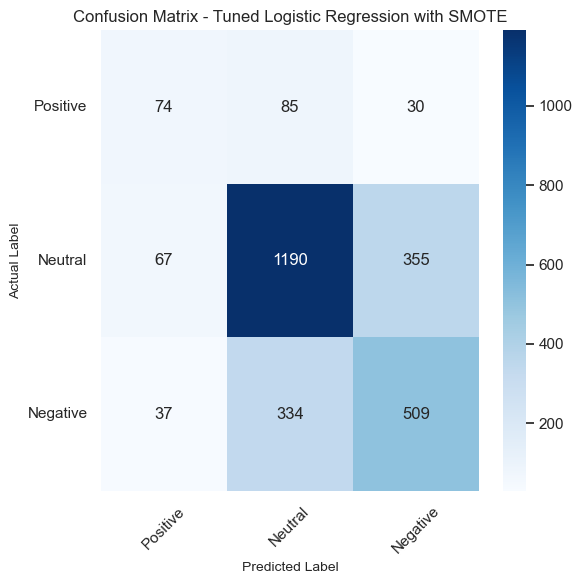

In [41]:
# Define the pipeline
pipe_lr = Pipeline([
    ('smote',SMOTE(random_state=42)),      
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced',random_state=42)) 
])

# Define the hyperparameters for grid search
param_grid = {
    'clf__C': [10],              # Regularization strength for Logistic Regression
    'clf__penalty': ['l2'],              # Regularization penalty (L2 is common for LR)
    'clf__solver': ['liblinear','saga'] # Solver to use in the optimization problem
}

# Set up the GridSearchCV
grid_search = GridSearchCV(pipe_lr, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid search on the training data
grid_search.fit(train_tfidf_df, y_train)

# Best hyperparameters found by grid search
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Evaluate on the validation set using the best estimator
y_pred_lr = grid_search.best_estimator_.predict(test_tfidf_df)

# Accuracy Score
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Validation Accuracy (Tuned Logistic Regression with SMOTE): {accuracy_lr:.4f}")

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
# Plot the confusion matrix (assuming plot_confusion_matrix is a custom function)
plot_confusion_matrix(conf_matrix_lr, classes=class_names, title='Confusion Matrix - Tuned Logistic Regression with SMOTE')


Results: 
- Best Hyperparameters: {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'saga', 'svd__n_components': 1000}
- Validation Accuracy (Tuned Logistic Regression with Truncated SVD): 0.6113

- Best Hyperparameters: {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'saga'}
- Validation Accuracy (Tuned Logistic Regression with SMOTE): 0.6613

The tuned LR model did not benefit at all by decomposition plus SMOTE. However with just SMOTE, the model performerd better than both baseline LR and NB models. The perormance is nearly the same as that of a tuned NB model. Overall, the model is still struggling o distinguish between the Neutral and Positive, and Neutral and Negative Classes. While this has significantly improved, it has costed the performance of the Neutral class.

Next I will try the ensemble models, Random Forest, AdaBoost and XGBoost to see if performance improves.

### 2.3 Ensemble Models

#### 2.3.1 Random Forest Model

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Hyperparameters Random Forest: {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 200}
Validation Accuracy (Hyperparameter Tuned Random Forest(SMOTE)): 0.6740


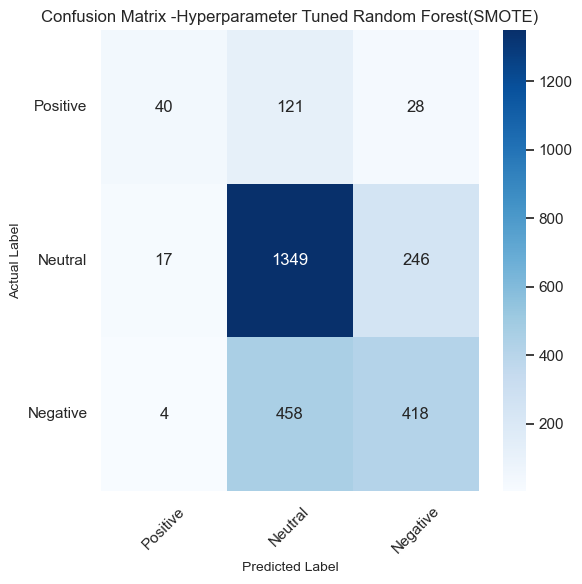

In [40]:
# Define the pipeline
pipe_rf = Pipeline([
    ('smote',SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(class_weight='balanced',random_state=42))
])

# Define the parameter grid for Grid Search
param_grid = {
    'clf__n_estimators': [200],
    'clf__max_depth': [None],
    'clf__min_samples_split': [5],
    'clf__min_samples_leaf': [1]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=pipe_rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(train_tfidf_df, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Best hyperparameters found by grid search
print(f"Best Hyperparameters Random Forest: {best_params}")

# Evaluate the best model on the validation set
y_pred_rf = best_model.predict(test_tfidf_df)
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Validation Accuracy (Hyperparameter Tuned Random Forest(SMOTE)): {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(conf_matrix, classes=class_names, title='Confusion Matrix -Hyperparameter Tuned Random Forest(SMOTE)')


Best Hyperparameters Random Forest: {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 200}. Although the model took forever, there is some slight improvement.

Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\wambu\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best AdaBoost Hyperparameters: {'clf__base_estimator__max_depth': 5, 'clf__learning_rate': 0.1, 'clf__n_estimators': 100}
Validation Accuracy (AdaBoost): 0.6162


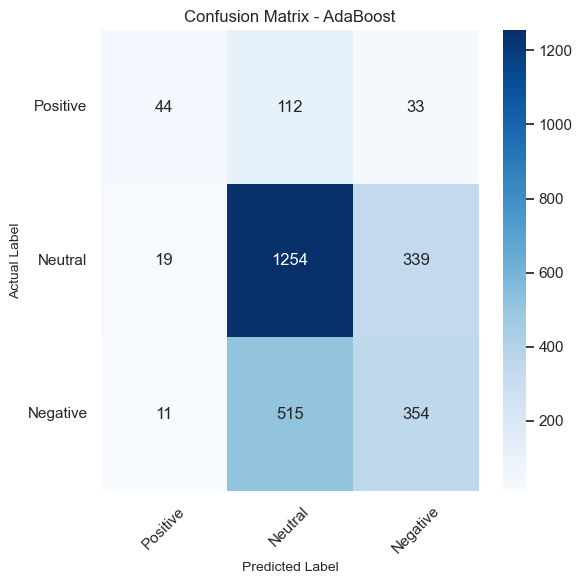

In [29]:
# Define the pipeline
pipe_ada = Pipeline([
    ('smote',SMOTE(random_state=42)),
    ('clf', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced', random_state=42), 
            random_state=42))
])

# Define the parameter grid for Grid Search
param_grid = {
    'clf__n_estimators': [100, 200],              # Number of boosting stages to be run
    'clf__learning_rate': [0.01, 0.1],           # Learning rate
    'clf__base_estimator__max_depth': [3, 5]  # Max depth of the base estimators (Decision Trees)
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=pipe_ada, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(train_tfidf_df, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best AdaBoost Hyperparameters: {best_params}")

# Evaluate the best model on the validation set
y_pred_ada = best_model.predict(test_tfidf_df)
accuracy = accuracy_score(y_test, y_pred_ada)
print(f"Validation Accuracy (AdaBoost): {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_ada)
plot_confusion_matrix(conf_matrix, classes=class_names, title='Confusion Matrix - AdaBoost')


In [29]:
from sklearn.preprocessing import LabelEncoder
from imblearn.pipeline import Pipeline

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training and test target labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#Define the pipeline
pipe_xgb = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42))
])

# Define the parameter grid for Grid Search
param_grid = {
    'clf__learning_rate': [0.01, 0.1],
    'clf__subsample': [0.7, 0.9],
    'clf__colsample_bytree': [0.7, 0.9]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=pipe_xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(train_tfidf_df, y_train_encoded)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Best XGBoost Hyperparameters: {best_params}")

# Evaluate the best model on the validation set
y_pred_xgb = best_model.predict(test_tfidf_df)
accuracy = accuracy_score(y_test_encoded, y_pred_xgb)
print(f"Validation Accuracy (XGBoost): {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_xgb)
plot_confusion_matrix(conf_matrix, classes=class_names, title='Confusion Matrix - XGBoost')


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best XGBoost Hyperparameters: {'clf__colsample_bytree': 0.7, 'clf__learning_rate': 0.1, 'clf__subsample': 0.9}
Validation Accuracy (XGBoost): 0.6337


NameError: name 'class_names' is not defined

Best XGBoost Hyperparameters: {'clf__colsample_bytree': 0.7, 'clf__learning_rate': 0.1, 'clf__subsample': 0.9}
Validation Accuracy (XGBoost): 0.6337